# Kagome Lattice in Real Space

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Number of Unit-Cell in Each Axes
l1 = l2 = 5 
# Total Number of sites
N = 3*l1*l2 

In [3]:
#Bravais Vectors
a1_vec = np.array([2,0])
a2_vec = np.array([1,np.sqrt(3)])
#Basis Vectors
b1=np.array([0,0]) #A atoms
b2=a1_vec/2 #B atoms
b3=a2_vec/2 #C atoms
#Basis Colors
Basis = [b1,b2,b3]
basis_colors=['red','blue','green']

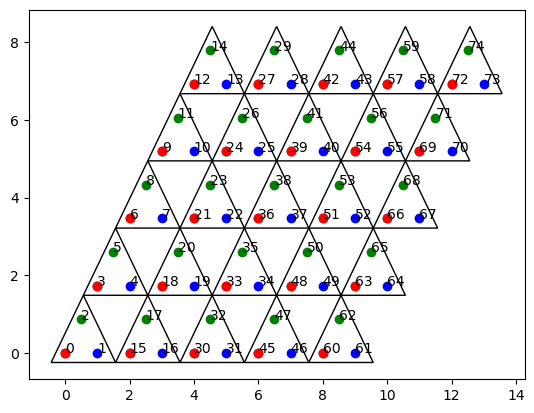

In [4]:
#Plot Kagome Lattice
fig, ax = plt.subplots()
#Coordinates of Sites
coordinates = []
#Labels of Sites
sites = []
#Coordinates and Labels of Sites
atom_dict={}
for i1 in range(l1):
    for i2 in range(l2):
        #Define Lattice Points
        Lp = a1_vec * i1 + a2_vec * i2
        ax.plot(Lp[0], Lp[1], marker='o', color='black')
        #Center Sites of Each Unit-Cells
        center = a1_vec * i1 + a2_vec * i2 + b1
        #Plot Triangular Unit-Cells
        shift = (-b2-b3)/np.sqrt(3)/2
        P1=np.array([center+shift,center+a1_vec+shift,center+a2_vec+shift])
        T=plt.Polygon(P1, fill=False)
        ax.add_patch(T)        
        for ib, b in enumerate(Basis):
            # Plot A,B,C Unit-Cell Sites
            atom_vec = Lp + b
            #Define Atom Type (A,B or C)
            atom_no = 3 * i1 * l2 + 3 * i2 + ib
            #Site Labels (Each Sites Defined by Specific 3 Features)
            #i1, i2 are axes and ib is atom type (A=0,B=1,C=2)
            site = [i1,i2,ib]
            sites.append(site)
            coordinates.append(atom_vec)
            atom_dict[tuple(site)]=atom_vec
            ax.plot(atom_vec[0], atom_vec[1], marker='o', color=basis_colors[ib], alpha=1)
            ax.annotate(str(atom_no), atom_vec)

In [5]:
#Nearest-Neighbors and Next-Nearest-Neighbors Hopping Matrix (i1,i2,ib)
NN = [[(0,0,1), (0,0,2), (-1,0,1),(0,-1,2),   (-1,0,2), (-1,1,1), (0,-1,1),(1,-1,2)], #A (red)
      [(0,0,-1),(0,0,1), (1,0,-1),(1,-1,1),   (0,-1,1), (1,-1,-1),(0,1,-1),(1,0,1)], #B (blue)
      [(0,0,-1),(0,0,-2),(0,1,-2),(-1,1,-1),  (-1,1,-2),(-1,0,-1),(0,1,-1),(1,0,-2)] #C (green)
      ]

In [6]:
#Hopping Parameters
#t1=-1;L1=t2=L2=0
t1=-1;L1=0.28;t2=-0.3;L2=0.2
#NN and NNN Hopping Phases Matrix According to the Hopping Matrix
hopps = [[t1+1j*L1,t1-1j*L1,t1+1j*L1,t1-1j*L1,  t2+1j*L2,t2-1j*L2,t2-1j*L2,t2+1j*L2], # A
         [t1-1j*L1,t1+1j*L1,t1-1j*L1,t1+1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2], # B
         [t1-1j*L1,t1+1j*L1,t1+1j*L1,t1-1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2]] # C

In [7]:
#Show Periodic NN and NNN B.C. Neighbors for a Specific Site
atom_index=18
atom_site=sites[atom_index]
atom_vec=coordinates[atom_index]
print(atom_index,". Atom Site:",atom_site,":")
for i_delta, delta in enumerate(NN[atom_site[2]]):
    neighbor_site = np.array(atom_site)+np.array(delta)
    neighbor_site[0] = neighbor_site[0]%l1
    neighbor_site[1] = neighbor_site[1]%l2    
    neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
    neighbor_vec=a1_vec*neighbor_site[0]+a2_vec*neighbor_site[1]+Basis[neighbor_site[2]]
    print("Delta:",delta, ", Neighbor Site",neighbor_site, ", Neighbor No:",neighbor_no)

18 . Atom Site: [1, 1, 0] :
Delta: (0, 0, 1) , Neighbor Site [1 1 1] , Neighbor No: 19
Delta: (0, 0, 2) , Neighbor Site [1 1 2] , Neighbor No: 20
Delta: (-1, 0, 1) , Neighbor Site [0 1 1] , Neighbor No: 4
Delta: (0, -1, 2) , Neighbor Site [1 0 2] , Neighbor No: 17
Delta: (-1, 0, 2) , Neighbor Site [0 1 2] , Neighbor No: 5
Delta: (-1, 1, 1) , Neighbor Site [0 2 1] , Neighbor No: 7
Delta: (0, -1, 1) , Neighbor Site [1 0 1] , Neighbor No: 16
Delta: (1, -1, 2) , Neighbor Site [2 0 2] , Neighbor No: 32


In [8]:
#Construct Real Space Kagome Hamiltonian
H = np.zeros([N,N],dtype=complex)
for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H[neighbor_no,atom_no]=hopps[atom_site[2]][i_delta]

Text(0, 0.5, '$E$')

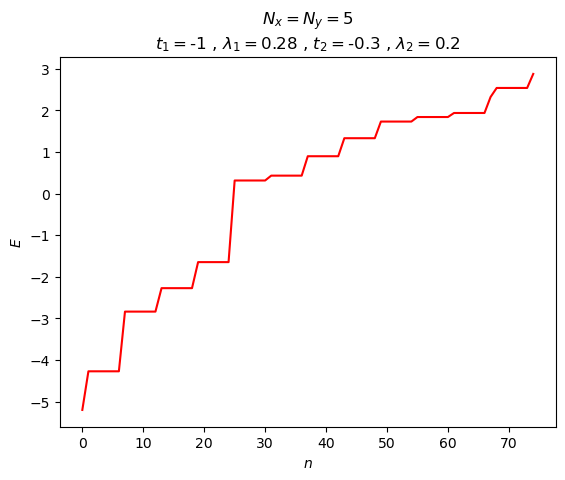

In [23]:
#Eigenvalues of Hamiltonian Matrix
w,v = np.linalg.eig(H)
idx = np.argsort(w)
sorted = w[idx]
x = np.arange(N)
y = sorted
plt.plot(x, y, 'r-', markersize=0.7)
plt.title(r"$N_x=N_y=$"+str(l1)+"\n"+r"$t_1=$"+str(t1)+" , "+r"$\lambda_1=$"+str(L1)+" , "+r"$t_2=$"+str(t2)+" , "+r"$\lambda_2=$"+str(L2))
plt.xlabel(r"$n$")
plt.ylabel(r"$E$")